In [1]:
# Support Vector Mechine(SVM)

# activation
# ----------
# y * ( w_[0] + X.T.dot(w_[1:]) )

# loss function
# -------------
# 

# 1. load and manipulate iris datasets
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# load iris datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# scalar datasets
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# combined datasets
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
# 2. SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

C:\Users\12923\AppData\Local\Temp\ipykernel_23848\3043421851.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


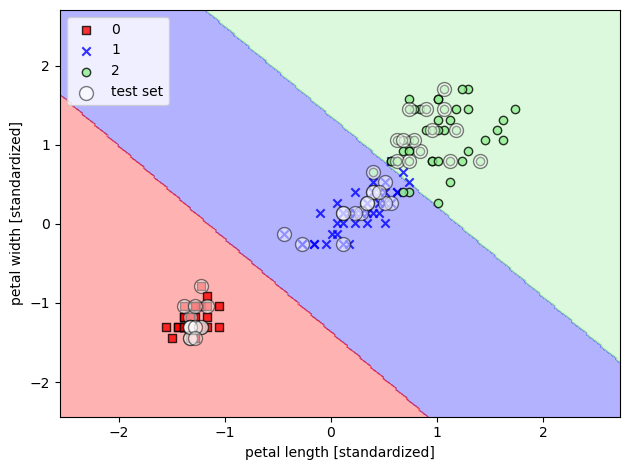

In [3]:
# 3. visualize prediction
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolutions=0.02):
    """Visualize decision regions usinng matplotlib colormap
    
    Parameters
    ----------
    X: array-like vector, shape = [n_examples, n_features]
        Training vectors, also called input.
    y: array-like vector, shape = [n_examples]
        Target values.
    classifier: python object, mainly class
        binary machine learning classifier
    resolutions: float
        visualization map resolutions

    """

    # marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # show class examples
    for idx, col in enumerate(np.unique(y)):
        plt.scatter(x=X[y == col, 0],
                    y=X[y == col, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=col,
                    edgecolors='black')
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1], 
                    c='white',
                    edgecolor='black', 
                    alpha=0.5,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

     0
0    1
1   -1
2    1
3    1
4    1
..  ..
195  1
196  1
197  1
198  1
199  1

[200 rows x 1 columns] 

            0         1
0    1.624345 -0.611756
1   -0.528172 -1.072969
2    0.865408 -2.301539
3    1.744812 -0.761207
4    0.319039 -0.249370
..        ...       ...
195 -1.426555  1.767960
196 -0.475373  0.477610
197 -1.021886  0.794528
198 -1.873161  0.920615
199 -0.035368  2.110605

[200 rows x 2 columns]
           0
0   1.624345
1   0.865408
2   1.744812
3   0.319039
4   1.462108
..       ...
95 -1.426555
96 -0.475373
97 -1.021886
98 -1.873161
99 -0.035368

[100 rows x 1 columns]
         0
0     True
1    False
2     True
3     True
4     True
..     ...
195   True
196   True
197   True
198   True
199   True

[200 rows x 1 columns]


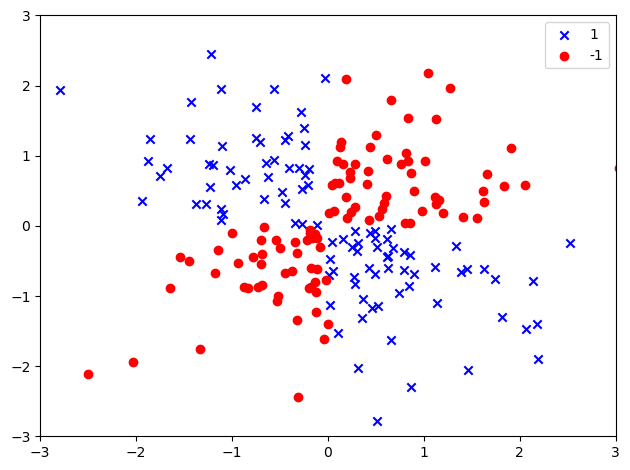

In [20]:
# 4. kernel method to deal with non-linear situations

# create a randomized 'xor' operations datasets, making it non-linear
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, 
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

print(pd.DataFrame(y_xor), '\n')
print(pd.DataFrame(X_xor))
print(pd.DataFrame(X_xor[y_xor == 1, 0]))   # y_xor == 1: iterates X_xor array to check whether that row index is true, and pick that row
print(pd.DataFrame(y_xor == 1))

plt.scatter(X_xor[y_xor == 1, 0], 
            X_xor[y_xor == 1, 1], 
            c='b', 
            marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0], 
            X_xor[y_xor == -1, 1], 
            c='r', 
            marker='o',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\12923\AppData\Local\Temp\ipykernel_23848\3043421851.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


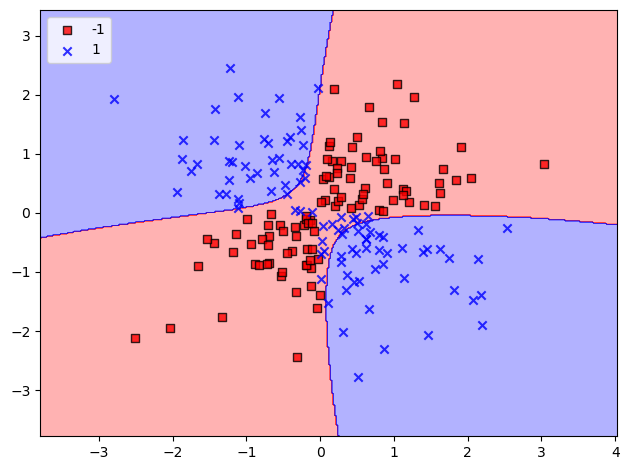

In [21]:
# imply new parameter 'rbf' to SVC to get kernel method's svm
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

C:\Users\12923\AppData\Local\Temp\ipykernel_23848\3043421851.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


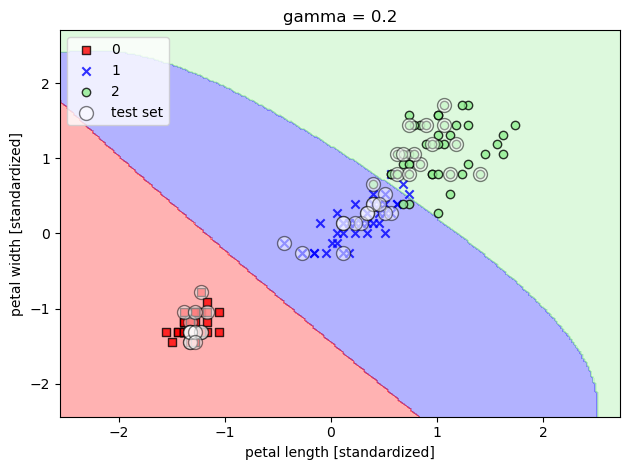

C:\Users\12923\AppData\Local\Temp\ipykernel_23848\3043421851.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == col, 0],


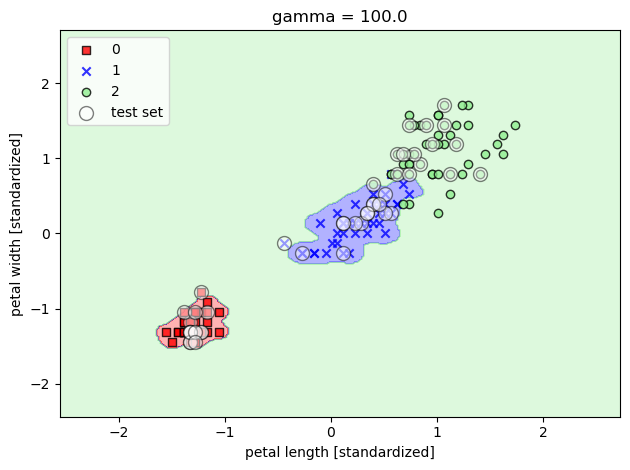

In [26]:
# compare parameter gamma to see how (gamma = 1 / 2 * sigma**2) controls the variance
svm_1 = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)       # gamma = 0.2
svm_1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_1, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('gamma = 0.2')
plt.tight_layout()
plt.show()

svm_2 = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)     # gamma = 100.0
svm_2.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('gamma = 100.0')
plt.tight_layout()
plt.show()